# First steps in analyzing text data

This worksheet does a first exploration of some text data with Python. 

The first step in analyzing text data is usually to count words (or whatever you are interested in counting in the text) and to store the results in a spreadsheet. We skip this step here (we will get to it later!) and assume we already have the data in a spreadsheet. 

We need a few Python packages for this:
* The Python ```pandas``` package is useful for managing data that comes in a spreadsheet. 
* ```numpy``` is for handling numerical data, in particular arrays.
* ```matplotlib``` is for visualizing data. 

In [1]:
import numpy as np
import pandas as pd

In this worksheet we work with a spreadsheet that is about Inaugural Addresses. It lists the dates, presidents' names, length of each address, and counts for a few selected words. 
Spreadsheet programs like Excel usually allow you to write your spreadsheet data in a format called *csv*, for comma-separated values. Python can read these files directly. 
Here is how to read the file inaugural.csv -- if it is in the same directory as your notebook. We read it into a pandas "data frame":

In [2]:
inaugural_df = pd.read_csv("inaugural.csv")

We can now inspect the top lines of this data frame using the commands ```head()```and```tail()```.

In [3]:
inaugural_df.head()

,Unnamed: 0,president,year,length,America,citizen,citizens,democracy,freedom,I,me,duties
0,1,Washington,1789,1538,0,0,5,0,0,23,8,1
1,2,Washington,1793,147,1,0,1,0,0,6,1,0
2,3,Adams,1797,2585,5,1,5,0,0,13,5,1
3,4,Jefferson,1801,1935,0,0,7,0,4,21,4,2
4,5,Jefferson,1805,2384,0,0,10,0,2,18,8,4


In [4]:
inaugural_df.tail()

,Unnamed: 0,president,year,length,America,citizen,citizens,democracy,freedom,I,me,duties
51,52,Clinton,1993,1855,19,0,2,4,3,7,1,0
52,53,Clinton,1997,2462,15,1,7,4,2,2,0,0
53,54,Bush,2001,1825,11,1,9,2,5,11,1,0
54,55,Bush,2005,2376,20,1,6,1,27,9,0,2
55,56,Obama,2009,2726,10,0,1,0,3,3,0,2


This spreadsheet comes from a dataset of inaugural addresses distributed with the Natural Language Toolkit. As you can see, this dataset has 56 inaugural addresses all in all, starting from Washington 1789 and ending with Obama 2009. We have columns for the last name of the president, the year, the length of the speech (Washingtons second speech was quite short, as you can see), and counts for the words "America", "citizen", "citizens", "democracy", "freedom", "I", "me", and "duties". 

## Selecting columns

Often we want to access individual columns and do something with them. Here is how to access the column "length": 

In [5]:
inaugural_df.length

0     1538
1      147
2     2585
3     1935
4     2384
5     1265
6     1304
7     3693
8     4909
9     3150
10    1208
11    1267
12    4171
13    9165
14    5196
15    1182
16    3657
17    3098
18    4005
19     785
20    1239
21    1478
22    2724
23    3239
24    1828
25    4750
26    2153
27    4371
28    2450
29    1091
30    5846
31    1905
32    1656
33    3756
34    4442
35    3890
36    2063
37    2019
38    1536
39     637
40    2528
41    2775
42    1917
43    1546
44    1715
45    2425
46    2028
47    1380
48    2801
49    2946
50    2713
51    1855
52    2462
53    1825
54    2376
55    2726
Name: length, dtype: int64

You can also get the column by writing this:

In [6]:
inaugural_df["length"]

0     1538
1      147
2     2585
3     1935
4     2384
5     1265
6     1304
7     3693
8     4909
9     3150
10    1208
11    1267
12    4171
13    9165
14    5196
15    1182
16    3657
17    3098
18    4005
19     785
20    1239
21    1478
22    2724
23    3239
24    1828
25    4750
26    2153
27    4371
28    2450
29    1091
30    5846
31    1905
32    1656
33    3756
34    4442
35    3890
36    2063
37    2019
38    1536
39     637
40    2528
41    2775
42    1917
43    1546
44    1715
45    2425
46    2028
47    1380
48    2801
49    2946
50    2713
51    1855
52    2462
53    1825
54    2376
55    2726
Name: length, dtype: int64

And here is how to access the column that contains counts of "citizen":

In [7]:
inaugural_df.citizen

0      0
1      0
2      1
3      0
4      0
5      0
6      0
7      5
8      0
9      1
10     0
11     0
12     1
13    11
14     0
15     0
16     1
17     0
18     1
19     0
20     2
21     1
22     1
23     2
24     5
25     3
26     3
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     2
35     2
36     0
37     1
38     1
39     0
40     0
41     3
42     0
43     0
44     3
45     0
46     0
47     0
48     0
49     0
50     1
51     0
52     1
53     1
54     1
55     0
Name: citizen, dtype: int64

As you can see, the counts for "citizen" are usually quite low per speech (with the strange exception of speech number 13). This is normal -- when you count a normal content word, such as "citizen", or "apple", or "skip" in a text as short as an inaugural speech, its counts will be low, even if it is a prominent concept in the text. (But you will see lots of occurrences of words like "the" or "and".)

What is going on with speech number 13? If you are curious, you can again use the head() command. Give it an argument that says how many lines in the beginning of the spreadsheet you want to see. Let's do 15 lines, that should show us what is going on.

In [8]:
inaugural_df.head(15)

,Unnamed: 0,president,year,length,America,citizen,citizens,democracy,freedom,I,me,duties
0,1,Washington,1789,1538,0,0,5,0,0,23,8,1
1,2,Washington,1793,147,1,0,1,0,0,6,1,0
2,3,Adams,1797,2585,5,1,5,0,0,13,5,1
3,4,Jefferson,1801,1935,0,0,7,0,4,21,4,2
4,5,Jefferson,1805,2384,0,0,10,0,2,18,8,4
5,6,Madison,1809,1265,0,0,1,0,1,11,8,2
6,7,Madison,1813,1304,0,0,4,0,0,4,2,1
7,8,Monroe,1817,3693,0,5,9,0,0,18,5,6
8,9,Monroe,1821,4909,2,0,15,0,0,26,6,4
9,10,Adams,1825,3150,0,1,2,1,5,15,6,6


Here we see that speech number 14 (or 13, if you start counting from zero as the boldfaced numbers on the left do), the speech of President Harrison, is unusually long overall. (In fact, it is the longest speech of all.)

## Selecting rows

The function ```head()``` is useful, but it only shows us the first few lines of the data frame. Pandas has quite powerful ways of *selecting* particular entries that we are interested in. To do that, we first need to talk again about tests in Python that give you a value of *True* or *False*. We had talked about them in the context of strings. Here, again, is the function `startswith()`, which tests whether a string starts with a particular prefix: 

In [9]:
"Harrison".startswith("H")

True

In [10]:
"Harrison".startswith("Hello")

False

Here are some more tests, this time for numbers. Here is one about whether the first number is greater than the second:

In [11]:
4 > 3

True

And this is "smaller or equal", with first the smaller-than, then the equals sign:

In [12]:
3 <= 10

True

The test for "equals" is written with two equals signs -- remember, we had already used up the single equals sign to mean "store": 

In [13]:
3 + 5 == 8

True

"equals" works for numbers as well as for strings: 

In [14]:
"hello" == "hello"

True

In [15]:
"hello" == "hi"

False

Now, back to selecting rows. For example, here is how we can get the row(s) where the president's name is Harrison:

In [16]:
inaugural_df[inaugural_df.president == "Harrison"]


,Unnamed: 0,president,year,length,America,citizen,citizens,democracy,freedom,I,me,duties
13,14,Harrison,1841,9165,0,11,27,4,6,45,15,5
25,26,Harrison,1889,4750,0,3,4,0,2,18,3,5


Look closely: We used straight brackets, as in an index, to select rows that match a particular Boolean condition. Our condition was about a string (the entry for 'president') being equal to "Harrison", and we used == for this, because a single = means "store" and only == means "is equal". 

Here is another example: Let's select all rows where the speech is more than 4000 words long:

In [17]:
inaugural_df[inaugural_df.length > 4000]

,Unnamed: 0,president,year,length,America,citizen,citizens,democracy,freedom,I,me,duties
8,9,Monroe,1821,4909,2,0,15,0,0,26,6,4
12,13,VanBuren,1837,4171,1,1,6,0,0,39,13,1
13,14,Harrison,1841,9165,0,11,27,4,6,45,15,5
14,15,Polk,1845,5196,0,0,11,0,2,24,5,9
18,19,Lincoln,1861,4005,0,1,6,0,0,44,6,1
25,26,Harrison,1889,4750,0,3,4,0,2,18,3,5
27,28,McKinley,1897,4371,0,0,8,0,1,21,3,2
30,31,Taft,1909,5846,4,0,6,0,2,32,2,5
34,35,Coolidge,1925,4442,8,2,2,0,6,8,0,1


You can combine conditions, but you have to use & for and, and | for or, and you need to use parentheses. Here is an example:

In [18]:
inaugural_df[(inaugural_df.president == "Bush") | (inaugural_df.president == "Obama")]

,Unnamed: 0,president,year,length,America,citizen,citizens,democracy,freedom,I,me,duties
50,51,Bush,1989,2713,7,1,2,5,6,26,0,0
53,54,Bush,2001,1825,11,1,9,2,5,11,1,0
54,55,Bush,2005,2376,20,1,6,1,27,9,0,2
55,56,Obama,2009,2726,10,0,1,0,3,3,0,2


**Try it for yourself**:

* Can you find all rows with speeches that are at most 1000 words long?

* Can you find all speeches after 2000? 

* Can you find all speeches that  mention either 'citizen' or 'citizens' at least once? 

In [46]:
inaugural_df[(inaugural_df.length <=1000)]

,Unnamed: 0,president,year,length,America,citizen,citizens,democracy,freedom,I,me,duties,freedom_rel,duties_rel
1,2,Washington,1793,147,1,0,1,0,0,6,1,0,0.00000,0.0
19,20,Lincoln,1865,785,0,0,0,0,0,1,0,0,0.00000,0.0
39,40,Roosevelt,1945,637,1,0,1,2,1,4,0,0,0.00157,0.0


In [47]:
inaugural_df[(inaugural_df.year > 2000)]

,Unnamed: 0,president,year,length,America,citizen,citizens,democracy,freedom,I,me,duties,freedom_rel,duties_rel
53,54,Bush,2001,1825,11,1,9,2,5,11,1,0,0.002740,0.000000
54,55,Bush,2005,2376,20,1,6,1,27,9,0,2,0.011364,0.000842
55,56,Obama,2009,2726,10,0,1,0,3,3,0,2,0.001101,0.000734


In [51]:
inaugural_df[(inaugural_df.citizen > 0) | (inaugural_df.citizens > 0 )]

,Unnamed: 0,president,year,length,America,citizen,citizens,democracy,freedom,I,me,duties,freedom_rel,duties_rel
0,1,Washington,1789,1538,0,0,5,0,0,23,8,1,0.000000,0.000650
1,2,Washington,1793,147,1,0,1,0,0,6,1,0,0.000000,0.000000
2,3,Adams,1797,2585,5,1,5,0,0,13,5,1,0.000000,0.000387
3,4,Jefferson,1801,1935,0,0,7,0,4,21,4,2,0.002067,0.001034
4,5,Jefferson,1805,2384,0,0,10,0,2,18,8,4,0.000839,0.001678
5,6,Madison,1809,1265,0,0,1,0,1,11,8,2,0.000791,0.001581
6,7,Madison,1813,1304,0,0,4,0,0,4,2,1,0.000000,0.000767
7,8,Monroe,1817,3693,0,5,9,0,0,18,5,6,0.000000,0.001625
8,9,Monroe,1821,4909,2,0,15,0,0,26,6,4,0.000000,0.000815
9,10,Adams,1825,3150,0,1,2,1,5,15,6,6,0.001587,0.001905


## Selecting rows and columns

When you selet rows, as in ```inaugural_df[inaugural_df.president == "Harrison"]```, the result is again a data frame, just a smaller one. So any operation you can apply to a data frame, you can apply to the result of row selection. Here is an example that first extracts a data frame with only those rows where the president is named Harrison, then extracts the "year" column -- that is, it extracts the years in which the inaugural address was given by some president named Harrison:

In [19]:
inaugural_df[inaugural_df.president == "Harrison"].year

13    1841
25    1889
Name: year, dtype: int64

This is an example of the "conveyor belt" programming idiom: You take a piece of data, apply a function to it, and then apply another function to the output of the first function, and so on.

**Try it for yourself:** What are the names of all presidents that gave speeches that were over 4000 words long?

## Min, max, mean

Pandas has function to analyze a column of numeric values. For example, we can find the minimum and maximum values. 

In [20]:
inaugural_df.length.min()

147

In [21]:
inaugural_df.length.max()

9165

The shortest speech, at 147 words, happens to be the second one given by Washington. The longest speech is the one we already noticed before, the one by Harrison. 

We can also get the average length of speeches:

In [22]:
inaugural_df.length.mean()

2602.410714285714

In [23]:
inaugural_df.length.std()

1516.8779872642206

## Histograms

Minimum, maximum and mean only tell us so much about speech lengths. It would be good to get a more comprehensive view of them. We can do that using a *histogram*. 

<AxesSubplot:>

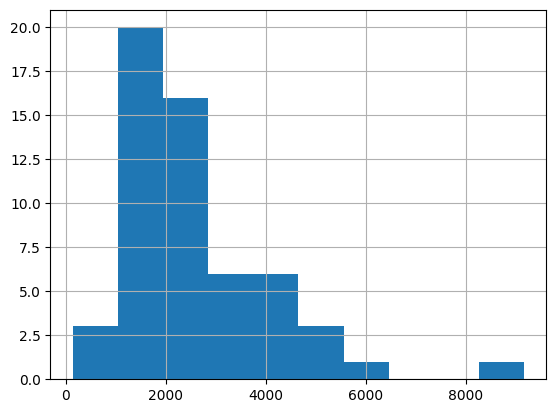

In [24]:
%matplotlib inline
inaugural_df.length.hist()

The first line in the box above is a piece of "iPython magic" (no, that is really its official name), not a general Python command but a command to Jupyter Notebooks to say that the output of the plot should appear directly in the notebook. (matplotlib is the name of the Python plotting package that pandas uses to do the plotting.) You only have to say this once per notebook. Once you have executed ```%matplotlib inline``` once, all plots will be visible. 

This histogram shows us what percentage of speeches is in which "box" of lengths. All speeches of length up to maybe 1600 (hard to see exaxtly in the graph) are grouped together, as are all speeches of length 1600-2000, and so on.

If the output of ```<matplotlib.axes._subplots.AxesSubplot at 0x1119b1510>``` bugs you, here is another Notebooks-specific trick: put a semicolon at the end of the last command, and the output will be suppressed. Like this:

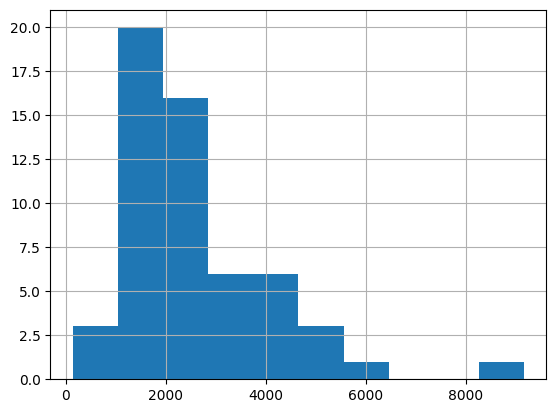

In [25]:
inaugural_df.length.hist();

**Try it for yourself**

* What is the maximum number of mentions of the word "America" in any speech?

* Can you do a histogram of the mentions of "I" across all inaugural speeches? Also do the same for "me". How do they compare?

Instead of selecting a column (called a Series in pandas), then calling `hist()` on it, you can also call `hist()` on a whole dataframe. In that case you have to give the column as a parameter:

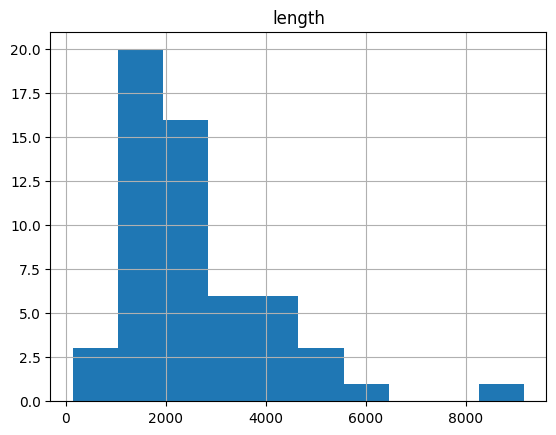

In [26]:
inaugural_df.hist(column = "length");

When, instead of a single column name, you list multiple column names in straight brackets, you can show multiple histograms next to each other. Make sure to set sharex and sharey to True so the x and y axes will have the same scale on both histograms, so you can actually compare them. Here you can see that the distributions of "I" and "America" are quite different, as we would expect:

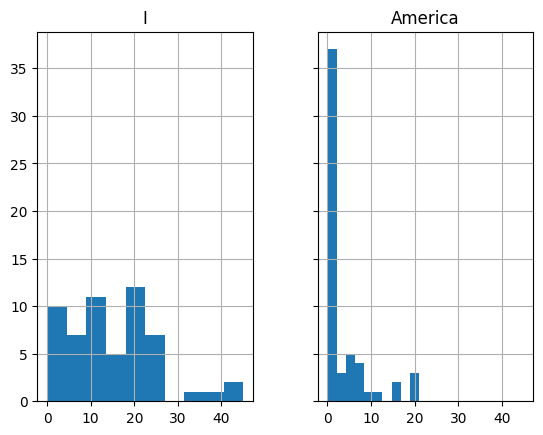

In [27]:
inaugural_df.hist(column=["I", "America"], 
                  sharex = True,
                  sharey=True);

## Plotting

How do speech lengths develop over time? This is something we cannot see in the histogram. To visualize speech length over time, we can do a lines plot that plots each speech length from the first to the last speech consecutively: 

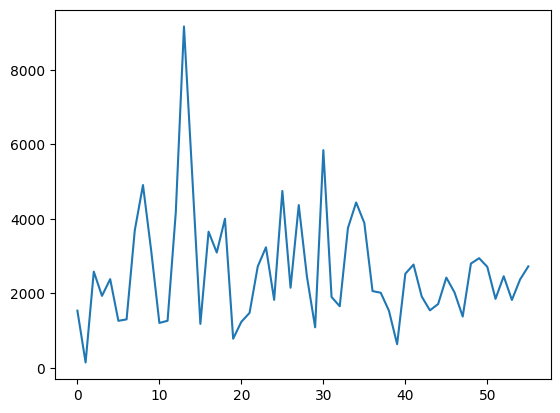

In [28]:
inaugural_df.length.plot();


This clearly shows the very long Harrison speech standing out. Overall I don't see any clear trend about speeches becoming either shorter or longer. 

But the x axis is not really pretty: It just shows the index of the speech, not the year. Can we do better? Yes, there is a way: We just need to specify that the x-axis should be the year.

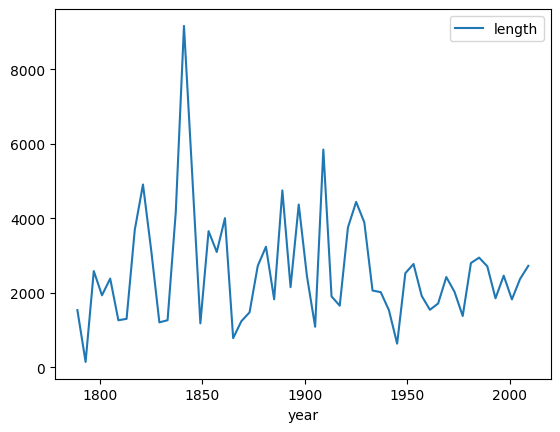

In [29]:
inaugural_df.plot(x = "year", y = "length");

Let's do things properly: A graph should always have a label on the x axis, a label on the y axis, and a title, so we know what is being plotted.

This introduces a new and very powerful technique: The plot() function that we apply to ```inaugural_df``` actually yields some kind of object, which we save in a variable we call ```plotvar```. And by applying functions to this object, we can modify the plot. 

The parameter ```legend = False``` says that we don't need the little legend in the upper right corner because we are only showing one single line in our graph. (Later, when we have multiple lines in a graph, we will definitely need the legend!)

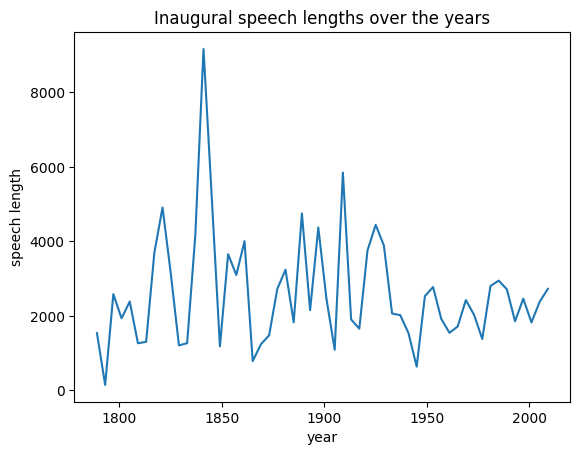

In [30]:
plotvar = inaugural_df.plot(x = "year", y = "length", 
                            title = "Inaugural speech lengths over the years", 
                            legend = False)
plotvar.set_xlabel("year")
plotvar.set_ylabel("speech length");

At this point you can customize your plot: Do you want a different color, or a somewhat different plotting style? 

Pandas uses matplotlib for plotting, which has somewhat obscure-looking incantations for changing the plotting *style*, for example we can get big dots along with our lines:

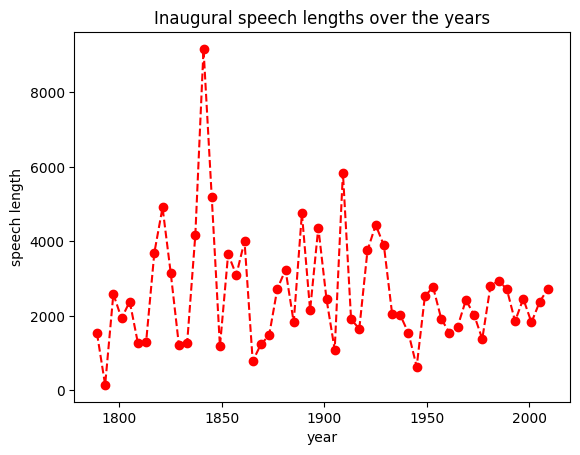

In [31]:
plotvar = inaugural_df.plot(x = "year", y = "length", 
                            title = "Inaugural speech lengths over the years", 
                            legend = False, 
                            style = "o--r")
plotvar.set_xlabel("year")
plotvar.set_ylabel("speech length");

In general, a matplotlib "format string" consists of three pieces:
    
* a marker
* a line
* optionally, a color

So the style above, "o-", said that we wanted big dots ("o"), then a normal line, and we didn't change the color. A format string of "p--r" would say that we want pentagon-shaped dots, a dashed line, and the whole thing in red. You can find a list of all formatting options on the following page. It's a long page, so you need to search for the string "Format string": https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

**Try it for yourself**:

* Do a plot of speech lengths over time in a color other than blue, and try at least two different line styles. 

* Do a plot of counts of the word "citizens" over time, with a title on the graph, with the x axis showing years, and with labels on the x and y axes. Choose whichever color and plotting style you like.

There are also different *kinds* of plots, as described here under "other plots": https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

You can also have a bar for each speech. This actually makes sense: With a line connecting speech lengths, it looks as if there were additional speeches with inbetween lengths between the actual inaugural speeches. But there is no medium-length speech between VanBuren and Harrison. When we have a bar for each speech, it is clear that each speech is an individual datapoint, with nothing inbetween.

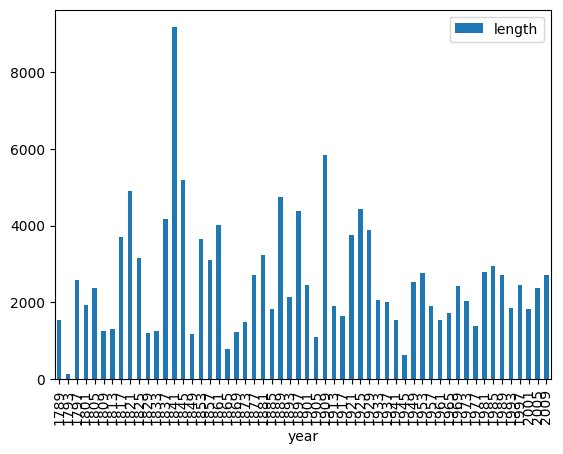

In [32]:
inaugural_df.plot(x = "year", y = "length", kind = "bar");

Now the x axis looks cluttered because it displays every single year. (I was not able to fix this issue using pandas plot(). You can also call matplotlib.pyplot's ```plot()```, and that fixes the issue. But it changes a whole lot of other things, so I won't do that in this worksheet here.)

## Multiple lines in a single graph

How can we get multiple lines in a single graph, for example to compare the counts of "freedom" to the counts of "duties"? This is what we work on next.

In a first step, we just visualize the counts of the word "freedom":

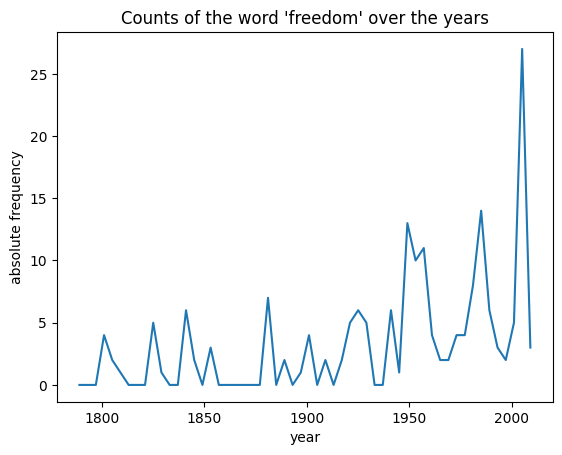

In [33]:
plotvar = inaugural_df.plot(x = "year", y = "freedom", 
                            title = "Counts of the word 'freedom' over the years", 
                            legend = False)
plotvar.set_xlabel("year")
plotvar.set_ylabel("absolute frequency");

As I said, our goal now is to plot the counts of multiple words at the same time, in particular "freedom" and "duties". 

The first step we need to take is to make a data frame that only contains the information we want to plot, in our case we need the columns "freedom" and "duties". 

In [34]:
freedom_and_duties = inaugural_df[ ["freedom", "duties"] ]

A few notes on the code above: These are double [] brackets. The inner set of brackets contains what is called a *list*, an ordered sequence of column names. They are the columns of the new data frame, in this order. 

We again use ```head()``` to display the first few lines:

In [35]:
freedom_and_duties.head()

,freedom,duties
0,0,1
1,0,0
2,0,1
3,4,2
4,2,4


Here we again have one row per year (although we cannot see the year), and each row shows the count of "freedom" and the count of "duties". 

And now we can plot multiple counts at once: If we apply plot() to a whole data frame, all the columns are plotted together. (Now we do want the legend to show up! We have two lines, a blue one and an orange one, and we need to show which line is which.)

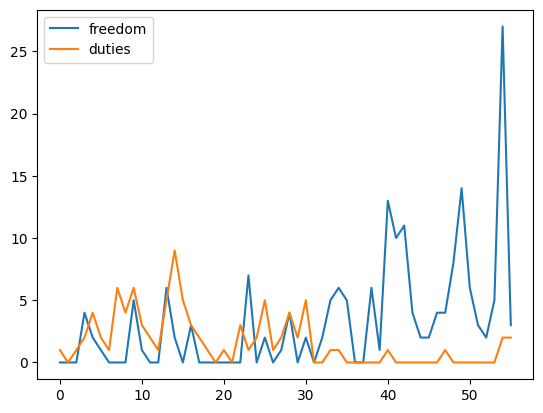

In [36]:
freedom_and_duties.plot();

It looks like the counts of "freedom" rose in later inaugural speeches, though the counts of "duties" petered out. 

But we lost the years on the x-axis. What we would like is to be able to plot "freedom" and "duties", and still have the year to display on the x axis. One way to do this is to have the year not as a column but as the index of the data frame.

So far we have had indices of 0, 1, 2, 3... on the dataframe. These are the boldfaced numbers shown on the left when we use the ```head()``` function:

In [37]:
freedom_and_duties.head()

,freedom,duties
0,0,1
1,0,0
2,0,1
3,4,2
4,2,4


What we do is to make a dataframe that contains "freedom", "duties", and "year", then move "year" to the index. Watch out: when we apply ```set_index()```, we need to store the result back in the variable ```freedom_and_duties```.

In [38]:
freedom_and_duties = inaugural_df[["freedom", "duties", "year"]]
freedom_and_duties = freedom_and_duties.set_index("year")
freedom_and_duties.head()

,freedom,duties
year,,
1789,0,1
1793,0,0
1797,0,1
1801,4,2
1805,2,4


Now we plot again, with proper axis labels and title. We leave the legend in, so we can see which line is for "freedom" and which is for "duties".

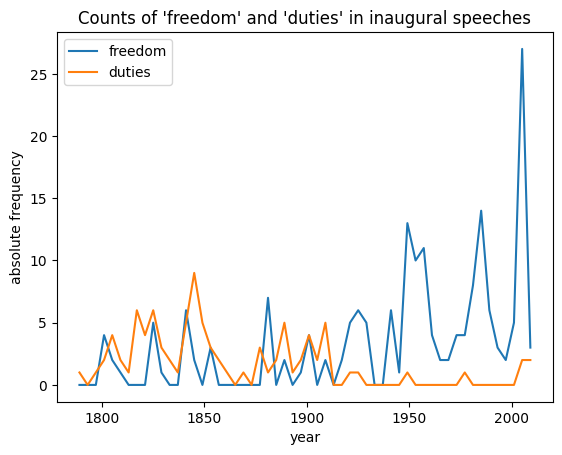

In [39]:
plotvar = freedom_and_duties.plot(title = "Counts of 'freedom' and 'duties' in inaugural speeches")
plotvar.set_xlabel("year")
plotvar.set_ylabel("absolute frequency");

There could be what is called a *confounding variable* in our plot: It looks like in around 1840, an inaugural speech mentioned both "freedom" and "duty" a lot -- but as we know, that was when Harrison gave his particularly long inaugural speech.  

The problem is that we are plotting *absolute* frequencies of "freedom" and "duties", which are influenced both by the rate at which the presidents mention these terms and by how long their speeches are. A better analysis would be to look at *relative* frequency: What is the rate at which *freedom* and *duties* are mentioned in the speech? The relative frequency is simply the absolute frequency divided by the length of the speech. 

We can very simply add new columns with relative frequencies to our data frame, like this:

In [40]:
inaugural_df["freedom_rel"] = inaugural_df.freedom / inaugural_df.length
inaugural_df["duties_rel"] = inaugural_df.duties / inaugural_df.length
inaugural_df.head()

,Unnamed: 0,president,year,length,America,citizen,citizens,democracy,freedom,I,me,duties,freedom_rel,duties_rel
0,1,Washington,1789,1538,0,0,5,0,0,23,8,1,0.000000,0.000650
1,2,Washington,1793,147,1,0,1,0,0,6,1,0,0.000000,0.000000
2,3,Adams,1797,2585,5,1,5,0,0,13,5,1,0.000000,0.000387
3,4,Jefferson,1801,1935,0,0,7,0,4,21,4,2,0.002067,0.001034
4,5,Jefferson,1805,2384,0,0,10,0,2,18,8,4,0.000839,0.001678


In [41]:
inaugural_df.head(10)

,Unnamed: 0,president,year,length,America,citizen,citizens,democracy,freedom,I,me,duties,freedom_rel,duties_rel
0,1,Washington,1789,1538,0,0,5,0,0,23,8,1,0.000000,0.000650
1,2,Washington,1793,147,1,0,1,0,0,6,1,0,0.000000,0.000000
2,3,Adams,1797,2585,5,1,5,0,0,13,5,1,0.000000,0.000387
3,4,Jefferson,1801,1935,0,0,7,0,4,21,4,2,0.002067,0.001034
4,5,Jefferson,1805,2384,0,0,10,0,2,18,8,4,0.000839,0.001678
5,6,Madison,1809,1265,0,0,1,0,1,11,8,2,0.000791,0.001581
6,7,Madison,1813,1304,0,0,4,0,0,4,2,1,0.000000,0.000767
7,8,Monroe,1817,3693,0,5,9,0,0,18,5,6,0.000000,0.001625
8,9,Monroe,1821,4909,2,0,15,0,0,26,6,4,0.000000,0.000815
9,10,Adams,1825,3150,0,1,2,1,5,15,6,6,0.001587,0.001905


Now let's plot relative rather than absolute frequencies. We need to fix the legend, though. We give the legend as a list of legend labels, in the same order as the columns in the data frame we are plotting.

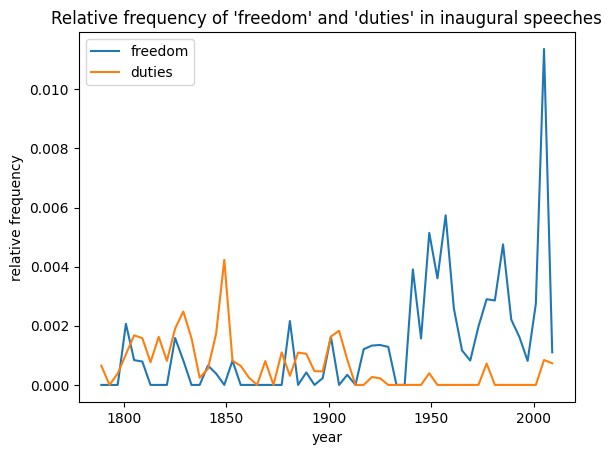

In [42]:
freedom_and_duties = inaugural_df[["freedom_rel", "duties_rel", "year"]]
freedom_and_duties = freedom_and_duties.set_index("year")
plotvar = freedom_and_duties.plot(title = "Relative frequency of 'freedom' and 'duties' in inaugural speeches")
plotvar.legend(["freedom", "duties"])
plotvar.set_xlabel("year")
plotvar.set_ylabel("relative frequency");

Now the problem with the confounding variable (length of the speech) is fixed. We don't see an effect of Harrison's particularly long speech anymore, and now we can say with some confidence that overall, mentions of "freedom" seem to be rising in recent years, while mentions of "duties" have petered out.

**Try it for yourself.**

* Pick two or three words and visualize their counts jointly in a single chart, using the same technique we used for "freedom" and "duties" above. Don't forget to chart *relative* frequencies rather than absolute. And don't forget the chart title and axis labels.

* Add a new column to the data frame that shows the joint counts of "I" and "me". Compute relative frequencies of this joint count of me-words, and chart it. (Or if you prefer, do this for "citizen" and "citizens" instead.)



You may want to change the plot styles on the multiple lines you visualize. It is better to have lines that are distinguished by features other than just color, so that colorblind people can distinguish the lines. Here is how we get "freedom" to show in red, with a dashed line and big dots for the plot points, and "duties" in green, with a dotted line, and stars for plot points: We add a `style` parameter that has several styles, one for each column plotted, in a list with straight brackets around it. 

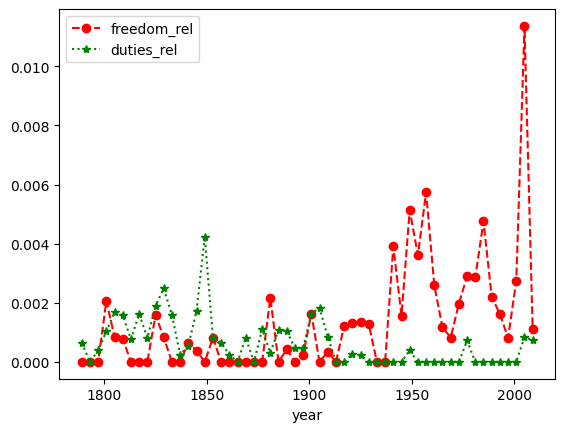

In [43]:
freedom_and_duties.plot(style = ["o--r", "*:g"]);

Integrating this into our code that fixes legend labels and add axis and graph titles, we get:

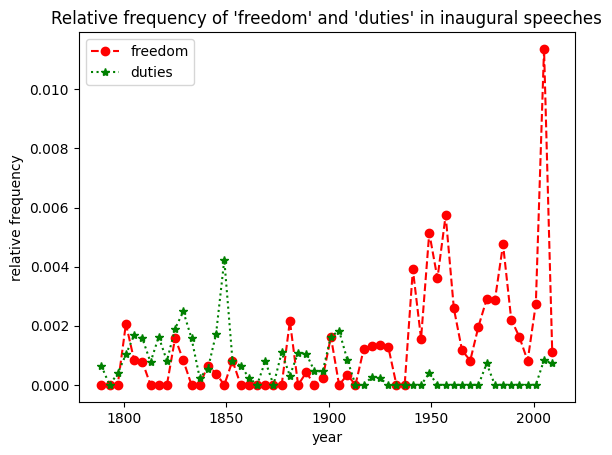

In [44]:
plotvar = freedom_and_duties.plot(title = "Relative frequency of 'freedom' and 'duties' in inaugural speeches",
                                 style = ["o--r", "*:g"])
plotvar.legend(["freedom", "duties"])
plotvar.set_xlabel("year")
plotvar.set_ylabel("relative frequency");